In [2]:
import sys
import numpy as np

from shapely import Point, MultiPoint, LineString, MultiLineString, Polygon, MultiPolygon
from shapely import affinity, intersects, line_merge, box, intersection
import matplotlib
from zeroheliumkit import GeomCollection, SpiralInductor
from zeroheliumkit.src.settings import *
from zeroheliumkit.src.importing import Reader_DXF, Reader_GDS, Reader_Pickle

%matplotlib widget
%config InlineBackend.figure_format='retina'

In [ ]:
# no need if zeroheliumkit is installed from github
sys.path.insert(1, "/Volumes/EeroQ/lib/zeroheliumkit-dev/")    

In [ ]:
from zeroheliumkit import Structure, Entity, Anchor, SuperStructure, GeomCollection, Taper, MultiAnchor, ArbitraryLine, Skeletone
from zeroheliumkit import Rectangle, Meander, MeanderHalf, Square, StraightLine, Circle
from zeroheliumkit.src.utils import midpoint, round_polygon
from zeroheliumkit.src.settings import *
from zeroheliumkit.src.importing import Reader_Pickle
from zeroheliumkit.helpers.resonator_calc import CPW_params

..\my_stuff\A_Quarter_2in_Wafer_2x7mm2_chips.gds // Layers in cell '$$$CONTEXT_INFO$$$': {0}
..\my_stuff\A_Quarter_2in_Wafer_2x7mm2_chips.gds // Layers in cell 'TEXT$3': {0}
..\my_stuff\A_Quarter_2in_Wafer_2x7mm2_chips.gds // Layers in cell 'TEXT$2': {0}
..\my_stuff\A_Quarter_2in_Wafer_2x7mm2_chips.gds // Layers in cell 'TEXT$1': {0}
..\my_stuff\A_Quarter_2in_Wafer_2x7mm2_chips.gds // Layers in cell 'TEXT': {0}
..\my_stuff\A_Quarter_2in_Wafer_2x7mm2_chips.gds // Layers in cell 'TOP': {0, 1}
Cells: {'$$$CONTEXT_INFO$$$': {0: <MULTIPOLYGON EMPTY>}, 'TEXT$3': {0: <MULTIPOLYGON (((0 0.1, 0.5 0.1, 0.5 0, 0 0, 0 0.1)), ((0.6 0.1, 0.6 0.6, 0....>}, 'TEXT$2': {0: <MULTIPOLYGON (((0 0.1, 0.5 0.1, 0.5 0, 0 0, 0 0.1)), ((0.6 0.1, 0.6 0.6, 0....>}, 'TEXT$1': {0: <MULTIPOLYGON (((0 0.1, 0.5 0.1, 0.5 0, 0 0, 0 0.1)), ((0.6 0.1, 0.6 0.6, 0....>}, 'TEXT': {0: <MULTIPOLYGON (((0 0.1, 0.5 0.1, 0.5 0, 0 0, 0 0.1)), ((0.6 0.1, 0.6 0.6, 0....>}, 'TOP': {0: <MULTIPOLYGON (((8656.695 16545.16, 8656.695 17045

<Axes: >

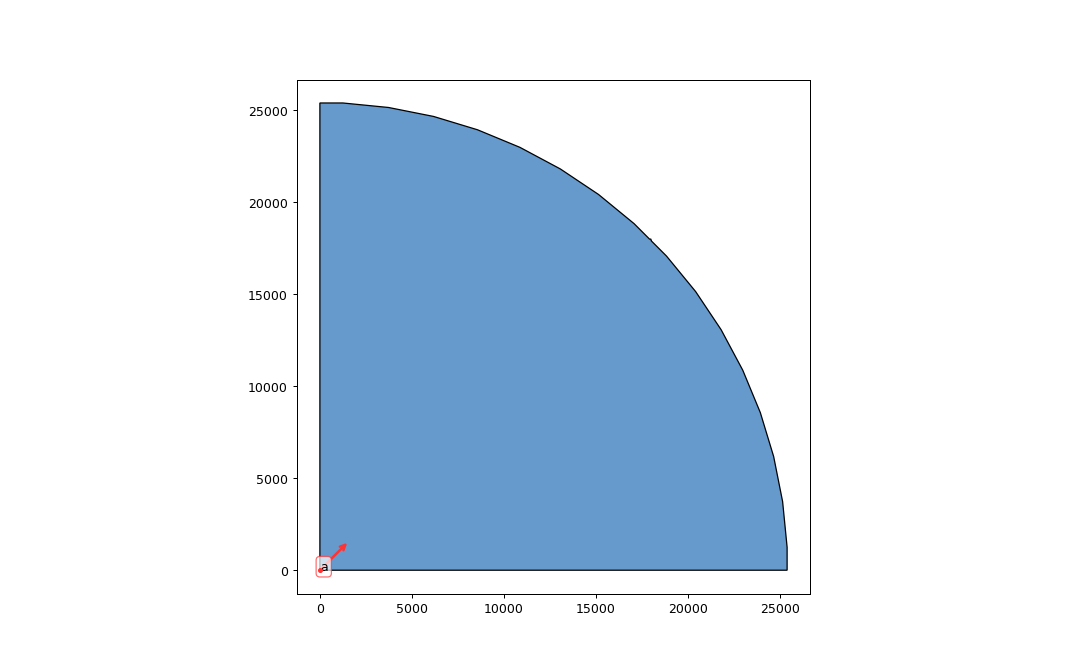

No such comm: 9e2fad9499d6418aac8f48e52266cb81
No such comm: 9e2fad9499d6418aac8f48e52266cb81
No such comm: 9e2fad9499d6418aac8f48e52266cb81
No such comm: 9e2fad9499d6418aac8f48e52266cb81
No such comm: 9e2fad9499d6418aac8f48e52266cb81
No such comm: 9e2fad9499d6418aac8f48e52266cb81
No such comm: 9e2fad9499d6418aac8f48e52266cb81
No such comm: 9e2fad9499d6418aac8f48e52266cb81
No such comm: 9e2fad9499d6418aac8f48e52266cb81
No such comm: 9e2fad9499d6418aac8f48e52266cb81
No such comm: 9e2fad9499d6418aac8f48e52266cb81
No such comm: 9e2fad9499d6418aac8f48e52266cb81
No such comm: 9e2fad9499d6418aac8f48e52266cb81
No such comm: 9e2fad9499d6418aac8f48e52266cb81
No such comm: 9e2fad9499d6418aac8f48e52266cb81
No such comm: 9e2fad9499d6418aac8f48e52266cb81
No such comm: 9e2fad9499d6418aac8f48e52266cb81
No such comm: 9e2fad9499d6418aac8f48e52266cb81
No such comm: 9e2fad9499d6418aac8f48e52266cb81
No such comm: 9e2fad9499d6418aac8f48e52266cb81


In [ ]:
plot_config = {"wafer": LIGHTGRAY,
               "bottom": YELLOW2,
               "gnd": BLUE,
               "top": ORANGE,
               "etch": VIOLET,
               "open": GREEN,
               "air": (GRAY,0.7),
               "skeletone": DARKGRAY,
               "anchors": RED}
route_config =  {"radius":100, "num_segments": 51}
gds = Reader_GDS(r"..\my_stuff\A_Quarter_2in_Wafer_2x7mm2_chips.gds")
print("Cells:", gds.cells)
gds.extract_geometries()
gds.import2zhk("TOP")
print("Geometries: ", gds.geometries)
t1 = GeomCollection(gds.geometries)
print("T1: ",t1)
plot_cfg = {"L1": BLUE, "L2": YELLOW2, "anchors": RED}

# Scale operation
t1.anchors.remove("a")
t1.add_anchor(Anchor((0,0), 45, "a"))
# Scale the geometries instead of t1.geom

t2=t1
t1.quickplot(plot_cfg)


[(3500, 1000), (10600, 1000), (17700, 1000), (24800, 1000), (31900, 1000), (39000, 1000), (46100, 1000), (3500, 3000), (10600, 3000), (17700, 3000), (24800, 3000), (31900, 3000), (39000, 3000), (46100, 3000), (3500, 5000), (10600, 5000), (17700, 5000), (24800, 5000), (31900, 5000), (39000, 5000), (46100, 5000), (3500, 7000), (10600, 7000), (17700, 7000), (24800, 7000), (31900, 7000), (39000, 7000), (46100, 7000), (3500, 9000), (10600, 9000), (17700, 9000), (24800, 9000), (31900, 9000), (39000, 9000), (46100, 9000), (3500, 11000), (10600, 11000), (17700, 11000), (24800, 11000), (31900, 11000), (39000, 11000), (46100, 11000), (3500, 13000), (10600, 13000), (17700, 13000), (24800, 13000), (31900, 13000), (39000, 13000), (46100, 13000), (3500, 15000), (10600, 15000), (17700, 15000), (24800, 15000), (31900, 15000), (39000, 15000), (46100, 15000), (3500, 17000), (10600, 17000), (17700, 17000), (24800, 17000), (31900, 17000), (39000, 17000), (46100, 17000), (3500, 19000), (10600, 19000), (177

<Axes: >

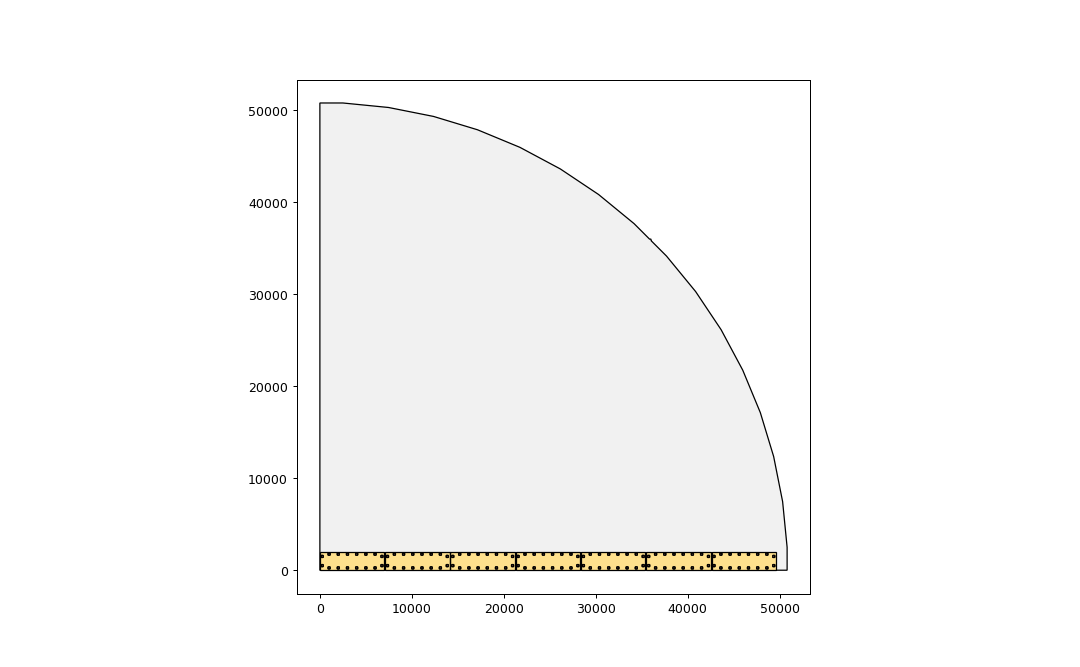

In [ ]:
quarter_wafer.remove_anchor("center")
quarter_wafer.remove_anchor("c")
pad.remove_anchor("o")




t1 = t2

import shapely.affinity as aff




route_config={
    
}
quarter_wafer = SuperStructure(route_config)


quarter_wafer.add_anchor(Anchor((0,0),0,"c"))


pad = Structure()

pad.add_layer("top", round_polygon(Square(200), 40))
pad.add_layer("gnd", pad.top.buffer(20))
pad.add_anchor(Anchor((0,0), -90, "o"))

chip = SuperStructure(route_config)

Lx = 7000
Ly = 2000
spacing = 1000
offset = 250

chip.add_layer("bottom", Rectangle(Lx, Ly))

coords_t = [(-Lx/2 + offset,spacing/2, 0)] + [(-spacing*5/2 + spacing*i, Ly/2 - offset, -90) for i in range(6)] + [(Lx/2 - offset,spacing/2, 180)]
coords_d = [(Lx/2 - offset,-spacing/2, 180)] + [(spacing*5/2 - spacing*i, -Ly/2 + offset, 90) for i in range(6)] + [(-Lx/2 + offset,-spacing/2, 0)]




for i, coord in enumerate(coords_t + coords_d):
    x, y, angle = coord
    chip.add_anchor(Anchor((x,y), angle, "p"+str(i)))

for anc in chip.anchors.labels:
    chip.append(pad, anchoring=(anc, "o"), direction_snap=True, remove_anchor="o")
    chip.remove_anchor(anc)
# chip.add_anchor(Anchor((-3500,-1000), 0, "bottom_left_corner"))
# chip.add_anchor(Anchor((3500,1000), 0, "top_right_corner"))
# chip.add_anchor(Anchor((-3500,1000), 0, "top_left_corner"))
chip.add_anchor(Anchor((0,0), 0, "chip_center"))
# chip.quickplot(plot_config)

offsetx = 2000
offsety = 7000

coords = []


for j in range(25):
    for i in range(7):
        coords.append((i*7100+3500,2000*j + 1000))
        quarter_wafer.add_anchor(Anchor(coords[i],0,"anc"+str(i)))
        quarter_wafer.append(chip,anchoring=("anc"+str(i),"chip_center"),direction_snap=True,remove_anchor="chip_center")
        quarter_wafer.remove_anchor("anc"+str(i))
print(coords)

xcount = 0
ycount = 0


# spacing = 


# quarter_wafer.append(chip,anchoring=("c","bottom_left_corner"), direction_snap=True,remove_anchor="bottom_left_corner")
quarter_wafer.remove_anchor("c")

for layer_name in t1.layers:
    print(layer_name)
    # Get the current geometry for this layer
    current_geom = getattr(t1, layer_name)
    scaled_geom = aff.scale(current_geom,2,2,1,(0,0,0))
    quarter_wafer.add_layer("wafer",scaled_geom)
    # Scale it and update the layer

pad.remove_anchor("c","a")
t1.remove_anchor("a")
quarter_wafer.quickplot(plot_config)


In [ ]:
chip = SuperStructure(route_config)

Lx = 7000
Ly = 2000
spacing = 1000
offset = 250

# chip.add_layer("wafer", Rectangle(Lx, Ly))

coords_t = [(-Lx/2 + offset,spacing/2, 0)] + [(-spacing*5/2 + spacing*i, Ly/2 - offset, -90) for i in range(6)] + [(Lx/2 - offset,spacing/2, 180)]
coords_d = [(Lx/2 - offset,-spacing/2, 180)] + [(spacing*5/2 - spacing*i, -Ly/2 + offset, 90) for i in range(6)] + [(-Lx/2 + offset,-spacing/2, 0)]

for i, coord in enumerate(coords_t + coords_d):
    x, y, angle = coord
    chip.add_anchor(Anchor((x,y), angle, "p"+str(i)))

for anc in chip.anchors.labels:
    chip.append(pad, anchoring=(anc, "o"), direction_snap=True, remove_anchor="o")




chip.quickplot(plot_config)

AttributeError: 'NoneType' object has no attribute 'direction'